In [116]:
from IPython.display import HTML
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

shap.initjs()

iris_X, iris_y = shap.datasets.iris()

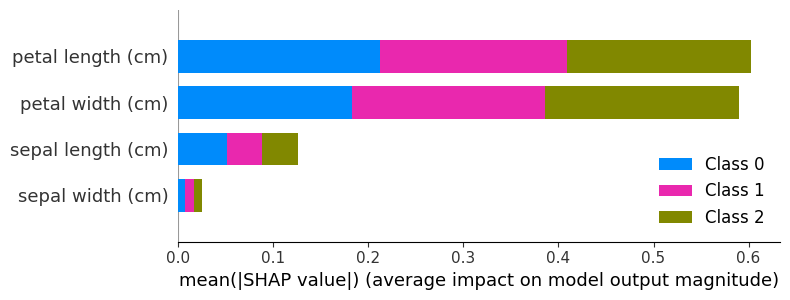

In [130]:
clf = RandomForestClassifier().fit(iris_X, iris_y)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(iris_X)

shap.summary_plot(shap_values, iris_X, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


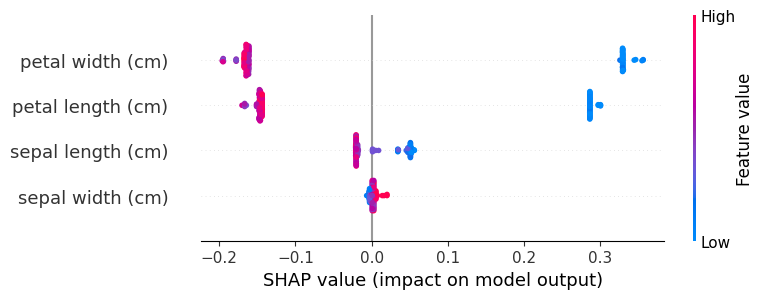

In [126]:
shap.summary_plot(shap_values[0], iris_X)

# petal width, petal lengthは、結果に対する影響が大きく、SHAP値が負に大きいことから、class0以外に分類させる要因となっていることがわかる

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


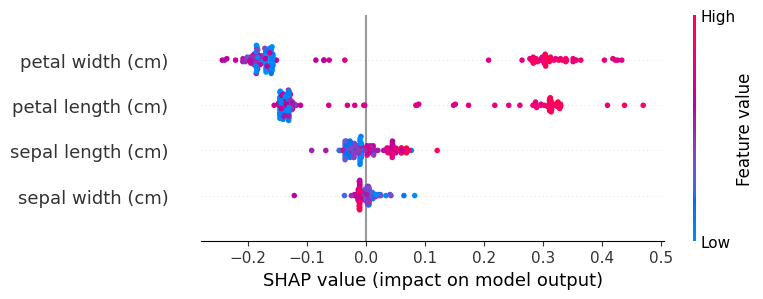

In [128]:
shap.summary_plot(shap_values[2], iris_X)

In [119]:
print(iris_y[70])
shap_values = explainer.shap_values(iris_X.iloc[70:71])

for i in range(len(shap_values)):
    # explainer.expected_value[i] is the expected value of the model output for the given class
    force_plot = shap.force_plot(explainer.expected_value[i], shap_values[i], iris_X[70:71])
    display(HTML(f"<div style='background-color:white;'>{shap.getjs() + force_plot.html()}</div>"))

# 矢印の向きで、outputをどちらに向けて変化させた特徴量なのかが分かる
# バーの長さは、寄与度を表す
# SHAPは、あるインプットが与えられた時、なぜモデルがそのアウトプットを出力したのかを各特徴量の寄与度を用いて説明する手法

1


In [118]:
shap_values = explainer.shap_values(iris_X)

for i in range(len(shap_values)):
    force_plot = shap.force_plot(explainer.expected_value[i], shap_values[i], iris_X)
    display(HTML(f"<div style='background-color:white;'>{shap.getjs() + force_plot.html()}</div>"))